In [133]:
# import
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

import plotly.graph_objects as go

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [134]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_6.xlsx', index_col=0)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    object 
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

In [136]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [137]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [138]:
df['season_1'][0]

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'],
 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'],
 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'],
 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'],
 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'],
 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'],
 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'],
 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'],
 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}

In [139]:
# 연령 제한 숫자로 변환
df['age_rating'] = df['age_rating'].replace('ALL', 0).astype(int)

# boxplot으로 이상치 체크

In [140]:
# runtime Box Plot 시각화
fig = go.Figure()

# runtime Box Plot
fig.add_trace(go.Box(
    y=df['watchlist'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['total_count'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.show()

In [141]:
df.sort_values(by='total_count',	   # 또는 바로 ['기준 컬럼']
			ascending=False)

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
17,브레이킹 배드,Breaking Bad,2008,5,47,"드라마, 범죄, 스릴러",19,미국,2200000,9.5,...,None,None,None,"['Adam Bernstein', 'Bronwen Hughes', 'Bryan Cr...","['Gennifer Hutchison', 'George Mastras', 'J. R...","['Bryan Cranston', 'Anna Gunn', 'Aaron Paul', ...",Breaking Bad (TV Series 2008–2013),https://www.imdb.com/title/tt0903747/,157,247
24,기묘한 이야기,Stranger Things,2016,4,61,"드라마, SF, 스릴러, 판타지, 공포",15,미국,1300000,8.7,...,None,None,None,"['Andrew Stanton', 'Dan Trachtenberg', 'Matt D...","['Alison Tatlock', 'Caitlin Schneiderhan', 'Cu...","['Winona Ryder', 'David Harbour', 'Finn Wolfha...",Stranger Things (TV Series 2016–2025),https://www.imdb.com/title/tt4574334/,112,311
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,8.1,...,None,None,None,"['Aisha Tyler', 'Alrick Riley', 'Avi Youabian'...","['Adam Fierro', 'Angela Kang', 'Channing Powel...","['Norman Reedus', 'Melissa McBride', 'Lauren C...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/,85,237
54,덱스터,Dexter,2006,8,53,"범죄, 드라마, 스릴러",19,미국,774000,8.6,...,None,None,None,"['Adam Davidson', 'Alik Sakharov', 'Brian Kirk...","['Adam Fierro', 'Arika Lisanne Mittman', 'Char...","['Michael C. Hall', 'Jennifer Carpenter', 'Dav...",Dexter (TV Series 2006–2013),https://www.imdb.com/title/tt0773262/,54,197
27,피키 블라인더스,Peaky Blinders,2013,6,58,"드라마, 범죄",19,영국,657000,8.8,...,None,None,None,"['Anthony Byrne', 'Colm McCarthy', 'David Caff...","['Stephen Russell', 'Steven Knight', 'Toby Fin...","['Cillian Murphy', 'Paul Anderson', 'Sophie Ru...",Peaky Blinders (TV Series 2013–2022),https://www.imdb.com/title/tt2442560/,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,앗! 크리스마스라니,Yoh! Christmas,2023,1,35,"코미디, 로맨스, 드라마",15,남아프리카공화국,209,5.3,...,None,None,None,NaN,"['Johnny Barbuzano', 'Tiffany Barbuzano']","['Katlego Lebogang', 'Siya Sepotokele', 'Didi ...",Yoh! Christmas (TV Series 2023,https://www.imdb.com/title/tt28948476/,0,0
813,파나티코,Fanático,2022,1,18,드라마,19,스페인,197,5.2,...,None,None,None,['Roger Gual'],"['Dani del Águila', 'Federico Maniá Sibona', '...","['Lorenzo Ferro', 'Dollar Selmouni', 'Carlota ...",Fanático (TV Series 2022,https://www.imdb.com/title/tt13322978/,0,0
818,케이지,The Cage,2022,1,37,"드라마, 코미디, 로맨스",12,쿠웨이트,171,6.4,...,None,None,None,['Jasem Al-Muhanna'],NaN,"['Rawan Mahdi', 'Hussain Al-Mahdi', 'Shabnam K...",The Cage (TV Series 2022),https://www.imdb.com/title/tt22055232/,0,0


In [142]:
# runtime Box Plot 시각화
fig = go.Figure()

fig.add_trace(go.Box(
    y=df['popularity'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['user_review'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.show()

In [143]:
df.sort_values(by='user_review',	   # 또는 바로 ['기준 컬럼']
			ascending=False)

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31,위쳐,The Witcher,2019,3,57,"액션, SF, 드라마, 판타지",19,미국,574000,8.0,...,None,None,None,"['Alex Garcia Lopez', 'Alik Sakharov', 'Bola O...","['Andrzej Sapkowski', 'Beau DeMayo', 'Clare Hi...","['Freya Allan', 'Henry Cavill', 'Anya Chalotra...",The Witcher (TV Series 2019),https://www.imdb.com/title/tt5180504/,7,33
17,브레이킹 배드,Breaking Bad,2008,5,47,"드라마, 범죄, 스릴러",19,미국,2200000,9.5,...,None,None,None,"['Adam Bernstein', 'Bronwen Hughes', 'Bryan Cr...","['Gennifer Hutchison', 'George Mastras', 'J. R...","['Bryan Cranston', 'Anna Gunn', 'Aaron Paul', ...",Breaking Bad (TV Series 2008–2013),https://www.imdb.com/title/tt0903747/,157,247
13,다크,Dark,2017,3,56,"드라마, SF, 스릴러, 범죄",19,독일,449000,8.7,...,None,None,None,['Baran bo Odar'],"['Baran bo Odar', 'Daphne Ferraro', 'Jantje Fr...","['Louis Hofmann', 'Karoline Eichhorn', 'Lisa V...",Dark (TV Series 2017–2020),https://www.imdb.com/title/tt5753856/,8,25
24,기묘한 이야기,Stranger Things,2016,4,61,"드라마, SF, 스릴러, 판타지, 공포",15,미국,1300000,8.7,...,None,None,None,"['Andrew Stanton', 'Dan Trachtenberg', 'Matt D...","['Alison Tatlock', 'Caitlin Schneiderhan', 'Cu...","['Winona Ryder', 'David Harbour', 'Finn Wolfha...",Stranger Things (TV Series 2016–2025),https://www.imdb.com/title/tt4574334/,112,311
51,종이의 집,Money Heist,2017,5,50,"스릴러, 액션, 범죄, 드라마, Made in Europe",19,스페인,536000,8.2,...,None,None,None,"['Albert Pintó', 'Alejandro Bazzano', 'Alex Ro...","['Alberto Úcar', 'Almudena Ramirez Pantanella'...","['Úrsula Corberó', 'Álvaro Morte', 'Itziar Itu...",Money Heist (TV Series 2017–2021),https://www.imdb.com/title/tt6468322/,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,이케부쿠로 웨스트 게이트 파크,Ikebukuro West Gate Park,2000,1,51,"드라마, 액션, 범죄, 코미디",19,일본,1100,7.7,...,None,None,None,"['Fuminori Kaneko', 'Yukihiko Tsutsumi']","['Ira Ishida', 'Kankurô Kudô']","['Tomoya Nagase', 'Ai Katô', 'Yôsuke Kubozuka'...",Ikebukuro West Gate Park (TV Series 2000),https://www.imdb.com/title/tt0331389/,0,0
783,체조 아카데미: 두 번째 기회,Gymnastics Academy: A Second Chance!,2022,1,26,"드라마, 가족, 스포츠",0,호주,285,5.9,...,None,None,None,"['Clay Glen', 'Kelly Schilling', 'Stephen de V...","['Clay Glen', 'Justine Wentzell-Chang', 'Krist...","['Emily Morris', 'Jada-Lee Henry', 'Stella Shu...",Gymnastics Academy: A Second Chance! (TV Serie...,https://www.imdb.com/title/tt15654944/,0,0
806,미안해 청춘!,Saving My Stupid Youth,2014,1,54,"코미디, 드라마",15,일본,615,7.3,...,None,None,None,"['Daisuke Yamamuro', 'Fuminori Kaneko', 'Ryôsu...",['Kankurô Kudô'],"['Ryô Nishikido', 'Hikari Mitsushima', 'Kento ...",Gomenne seishun! (TV Mini Series 2014),https://www.imdb.com/title/tt3912208/,0,0


In [144]:
# runtime Box Plot 시각화
fig = go.Figure()


fig.add_trace(go.Box(
    y=df['total_rate'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['critic_review'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['wins'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.add_trace(go.Box(
    y=df['nominations'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8
))

fig.show()

In [145]:
df.sort_values(by='critic_review',	   # 또는 바로 ['기준 컬럼']
			ascending=False)

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
24,기묘한 이야기,Stranger Things,2016,4,61,"드라마, SF, 스릴러, 판타지, 공포",15,미국,1300000,8.7,...,None,None,None,"['Andrew Stanton', 'Dan Trachtenberg', 'Matt D...","['Alison Tatlock', 'Caitlin Schneiderhan', 'Cu...","['Winona Ryder', 'David Harbour', 'Finn Wolfha...",Stranger Things (TV Series 2016–2025),https://www.imdb.com/title/tt4574334/,112,311
7,워킹 데드,The Walking Dead,2010,11,46,"드라마, SF, 액션, 공포, 스릴러",19,미국,1100000,8.1,...,None,None,None,"['Aisha Tyler', 'Alrick Riley', 'Avi Youabian'...","['Adam Fierro', 'Angela Kang', 'Channing Powel...","['Norman Reedus', 'Melissa McBride', 'Lauren C...",The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/,85,237
54,덱스터,Dexter,2006,8,53,"범죄, 드라마, 스릴러",19,미국,774000,8.6,...,None,None,None,"['Adam Davidson', 'Alik Sakharov', 'Brian Kirk...","['Adam Fierro', 'Arika Lisanne Mittman', 'Char...","['Michael C. Hall', 'Jennifer Carpenter', 'Dav...",Dexter (TV Series 2006–2013),https://www.imdb.com/title/tt0773262/,54,197
47,더 크라운,The Crown,2016,6,55,"드라마, 역사",15,영국,258000,8.6,...,None,None,None,"['Alex Gabassi', 'Benjamin Caron', 'Christian ...","['Amy Jenkins', 'Daniel Marc Janes', 'David Ha...","['Claire Foy', 'Olivia Colman', 'Imelda Staunt...",The Crown (TV Series 2016–2023),https://www.imdb.com/title/tt4786824/,149,391
13,다크,Dark,2017,3,56,"드라마, SF, 스릴러, 범죄",19,독일,449000,8.7,...,None,None,None,['Baran bo Odar'],"['Baran bo Odar', 'Daphne Ferraro', 'Jantje Fr...","['Louis Hofmann', 'Karoline Eichhorn', 'Lisa V...",Dark (TV Series 2017–2020),https://www.imdb.com/title/tt5753856/,8,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,내 아이디는 강남미인,My ID is Gangnam Beauty,2018,1,57,"코미디, 드라마, 로맨스",15,대한민국,6300,7.3,...,None,None,None,['Sung-Beom Choi'],NaN,"['Im Soo-hyang', 'Cha Eun-woo', 'Jo Woo-ri', '...",My ID Is Gangnam Beauty (TV Series 2018),https://www.imdb.com/title/tt8585954/,4,0
781,"엘리트들, 못다 한 이야기: 카를라 사무엘",Elite Short Stories: Carla Samuel,2021,1,14,"드라마, 로맨스",15,스페인,3000,6.8,...,None,None,None,['Jorge Torregrossa'],['Carlos Montero'],"['Ester Expósito', 'Itzan Escamilla', 'Carlota...",Elite Short Stories: Carla Samuel (TV Mini Ser...,https://www.imdb.com/title/tt14675560/,0,0
782,고르디우스의 매듭,Intersection,2016,2,95,드라마,15,터키,1600,6.6,...,None,None,None,"['Berat Özdogan', 'Deniz Yorulmazer', 'Gökçen ...","['Ayfer Tunç', 'F. Klavye', 'Feraye Sahin', 'I...","['Ibrahim Celikkol', 'Alican Yücesoy', 'Belçim...",Kördügüm (TV Series 2016),https://www.imdb.com/title/tt5303668/,0,1


In [146]:
# feature 분포확인도 확인해볼까?

- 드라마의 전반적인 인기도와 관련된 컬럼들

popularity 삭제 해보기

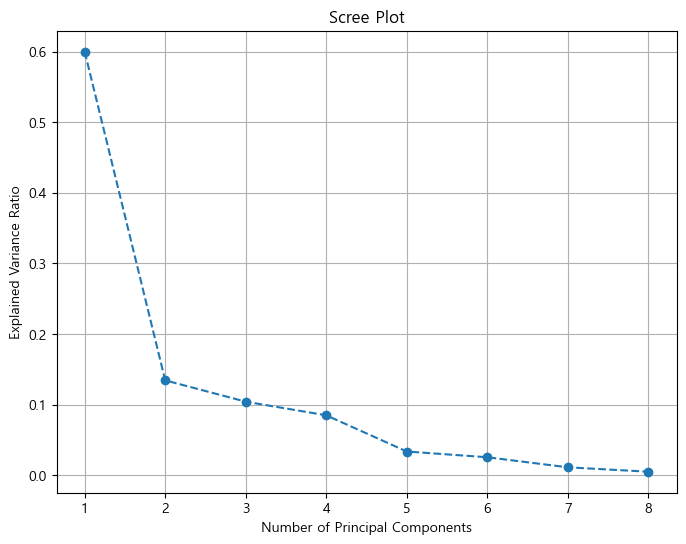

In [147]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()

metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['wins'] = df['wins']
metrics_df['nominations'] = df['nominations']

# 데이터 표준화
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df)

# PCA 수행
pca = PCA()
pca.fit(metrics_df_scaled)

# Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [148]:
# NumPy 배열을 데이터프레임으로 변환
metrics_df_scaled_df = pd.DataFrame(metrics_df_scaled, columns=metrics_df.columns)

In [149]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio:.4f}")

Explained variance ratio for each principal component:
Principal Component 1: 0.5998
Principal Component 2: 0.1345
Principal Component 3: 0.1044
Principal Component 4: 0.0851
Principal Component 5: 0.0338
Principal Component 6: 0.0257
Principal Component 7: 0.0115
Principal Component 8: 0.0052


첫 번째 두 주성분 사용:

PC1과 PC2는 합쳐서 약 73.43%의 분산을 설명하므로, 데이터의 절반 이상을 설명할 수 있습니다.
데이터의 주요 패턴을 이해하기에 충분할 수 있습니다.

주성분 개수 결정:

설명된 분산 비율이 급격히 감소하는 지점까지의 주성분을 선택합니다.
이 경우, PC1부터 PC2까지의 주성분이 적절할 수 있습니다.

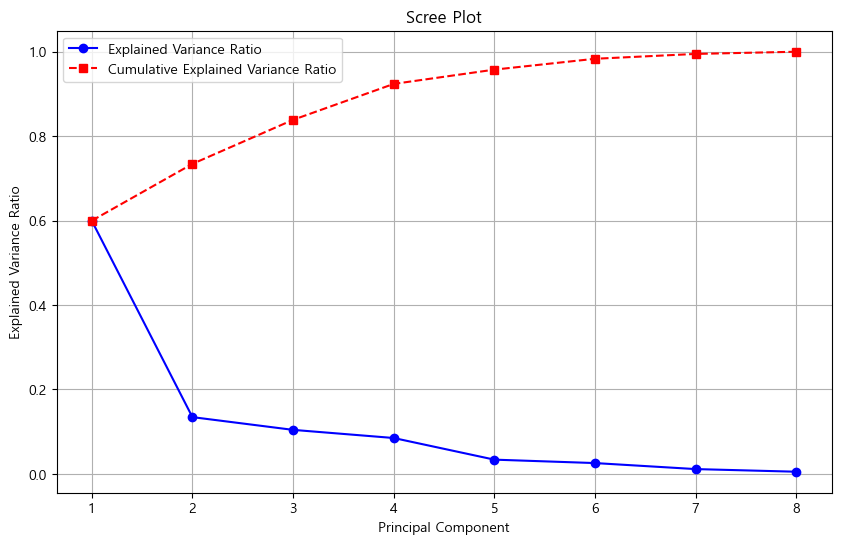

In [150]:
# 주성분 번호
components = range(1, len(explained_variance_ratio) + 1)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = [sum(explained_variance_ratio[:i+1]) for i in range(len(explained_variance_ratio))]

# 팔꿈치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance_ratio, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.plot(components, cumulative_variance_ratio, marker='s', linestyle='--', color='r', label='Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components)
plt.legend()
plt.grid(True)
plt.show()

팔꿈치 그래프 (Scree Plot): 주성분 개수에 따른 설명된 분산의 그래프를 확인하여 '팔꿈치' 부분에서 설명된 분산의 증가가 완만해지는 지점을 찾습니다. 이 지점 이후의 주성분들은 데이터의 분산을 설명하는 데 큰 기여를 하지 않을 가능성이 높습니다.

In [151]:
# PCA 적용 (n_components=2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(metrics_df_scaled_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df_scaled_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df_scaled_df.columns))}
weights_pc2 = {metrics_df_scaled_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df_scaled_df.columns))}

print("Weights for PC1:")
print(weights_pc1)

print("Weights for PC2:")
print(weights_pc2)

Weights for PC1:
{'watchlist': 0.43006368688103896, 'total_rate': 0.1776843791477569, 'total_count': 0.42645990509931136, 'popularity': -0.05075027609189452, 'user_review': 0.35537738518182194, 'critic_review': 0.40506629286139173, 'wins': 0.3883850206680694, 'nominations': 0.3972595293532545}
Weights for PC2:
{'watchlist': -0.032994014925229465, 'total_rate': 0.5487983475786176, 'total_count': -0.045943741657683675, 'popularity': 0.8328462367892234, 'user_review': -0.027135969294422118, 'critic_review': -0.03360744327467707, 'wins': 0.009819074143237573, 'nominations': -0.005084471710420307}


PC1: PC1은 주로 watchlist, total_count, user_review, critic_review, wins, nominations 변수들이 큰 양의 가중치를 가지고 있습니다. 이는 PC1이 이러한 변수들 사이의 양의 관계와 패턴을 설명한다는 것을 나타냅니다. 특히 critic_review, nominations, wins 등이 높은 가중치를 가지고 있어, 이들이 PC1을 구성하는 주요 요소라고 할 수 있습니다. 이 변수들은 주로 데이터를 설명하는 주요 변수들로 간주될 수 있습니다.

PC2: total_rate, popularity와 관련된 변수들이 큰 절대값의 가중치를 가지고 있으며 높은 기여를 함. 이들은 강한 음의 상관관계를 가지고 있습니다. 이 변수들은 데이터를 설명하는 또 다른 중요한 차원을 나타냅니다.

In [152]:
# 주성분을 데이터프레임으로 변환
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# 원래 데이터프레임에 주성분 추가
df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']

# 결과 확인
print(df)

                       korean_title                      english_title  year  \
Unnamed: 0                                                                     
0                            오징어 게임                         Squid Game  2021   
1                          12인의 심판자                         The Twelve  2019   
2                            희생자 게임                  The Victims' Game  2020   
3                스위트 투스: 사슴뿔을 가진 소년                        Sweet Tooth  2021   
4                              스위트홈                         Sweet Home  2020   
...                             ...                                ...   ...   
900                             레일라                              Leila  2019   
901                     100만 엔의 여인들                  Million Yen Women  2017   
902                         킬러 코미디언                            Hasmukh  2020   
903                              달러                             Dollar  2019   
904         엘리트들, 못다 한 이야기: 나디아 구스만  Eli

In [153]:
# 각 주성분이 원래 변수들과 어떤 상관관계를 가지는지 확인
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])], index=metrics_df.columns)
print('Loadings:\n', loadings)

Loadings:
                     PC1       PC2
watchlist      0.430064 -0.032994
total_rate     0.177684  0.548798
total_count    0.426460 -0.045944
popularity    -0.050750  0.832846
user_review    0.355377 -0.027136
critic_review  0.405066 -0.033607
wins           0.388385  0.009819
nominations    0.397260 -0.005084


In [154]:
# 각 주성분의 가중치 설정 (설명된 분산 비율 사용)
weights = explained_variance_ratio[:2] / explained_variance_ratio[:2].sum()

# 각 주성분에 대한 가중치 출력
print(f"Weights for PC1, PC2: {weights}")

# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights_pc1, weights_pc2, weights):
    # 각 주성분의 흥행지표 계산
    metric_pc1 = sum(weights_pc1[col] * row[col] for col in metrics_df_scaled_df.columns)
    metric_pc2 = sum(weights_pc2[col] * row[col] for col in metrics_df_scaled_df.columns)

    # 종합 흥행지표 계산
    total_metric = weights[0] * metric_pc1 + weights[1] * metric_pc2
    return total_metric

# 종합 흥행지표 계산 및 결과 출력
df['success_metric'] = metrics_df_scaled_df.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2,weights), axis=1)

# 결과 출력
print(df[['korean_title', 'success_metric']])

Weights for PC1, PC2: [0.816767 0.183233]
                       korean_title  success_metric
Unnamed: 0                                         
0                            오징어 게임        6.220036
1                          12인의 심판자       -0.149913
2                            희생자 게임       -0.660761
3                스위트 투스: 사슴뿔을 가진 소년        1.633644
4                              스위트홈        0.154365
...                             ...             ...
900                             레일라       -0.949229
901                     100만 엔의 여인들       -0.762300
902                         킬러 코미디언       -1.120096
903                              달러       -1.009103
904         엘리트들, 못다 한 이야기: 나디아 구스만       -1.092718

[905 rows x 2 columns]


In [155]:
# 비율 변경시
# # 최종 지표 생성 (예제 가중치 사용)
# # 여기서는 첫 번째와 두 번째 주성분만 사용하고, 가중치를 0.7과 0.3으로 설정
# weights = [0.7, 0.3]
# final_metric = np.dot(pca.transform(metrics_df_scaled)[:, :2], weights)

# # 결과 출력
# print('Final metric:\n', final_metric)

             korean_title  success_metric
Unnamed: 0                               
17                브레이킹 배드       20.873412
24                기묘한 이야기       18.939425
7                   워킹 데드       15.288260
47                  더 크라운       12.118910
42                베터 콜 사울       10.828568
54                    덱스터        9.931164
59              하우스 오브 카드        8.173696
46                  블랙 미러        7.923190
31                     위쳐        7.803256
19                   바이킹스        7.759921
43                  퀸스 갬빗        7.110896
51                  종이의 집        7.082512
33                    오자크        7.060177
13                     다크        6.845381
27               피키 블라인더스        6.749497
28                    하우스        6.256550
0                  오징어 게임        6.220036
109         오렌지 이즈 더 뉴 블랙        5.952150
9                     플래시        5.534938
62              엄브렐러 아카데미        4.817306
61            오티스의 비밀 상담소        4.548278
72                 코브라 카이        4

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



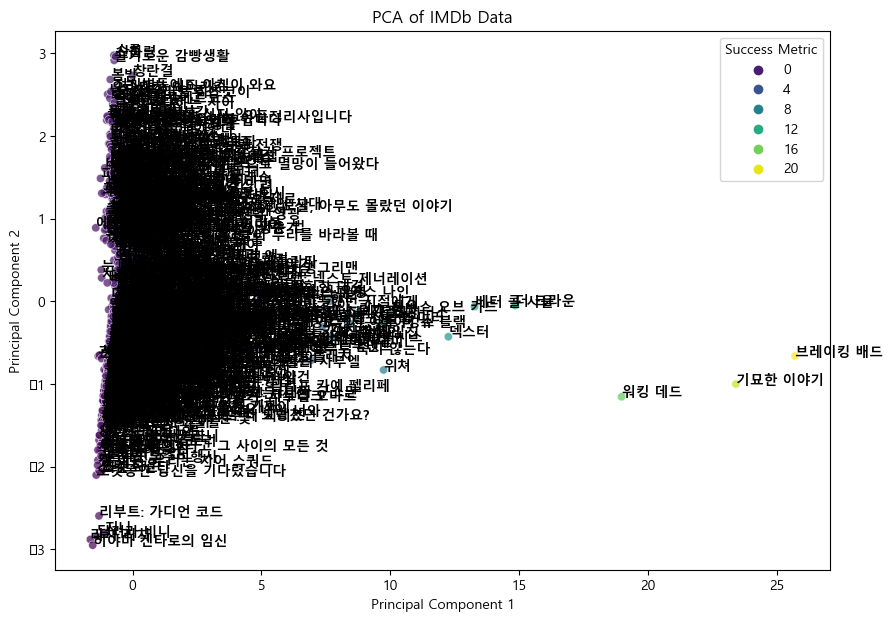

In [156]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

# 시각화
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)

# 각 점에 korean_title 표시
for line in range(0, df.shape[0]):
    scatterplot.text(df.PC1[line], df.PC2[line], df.korean_title[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

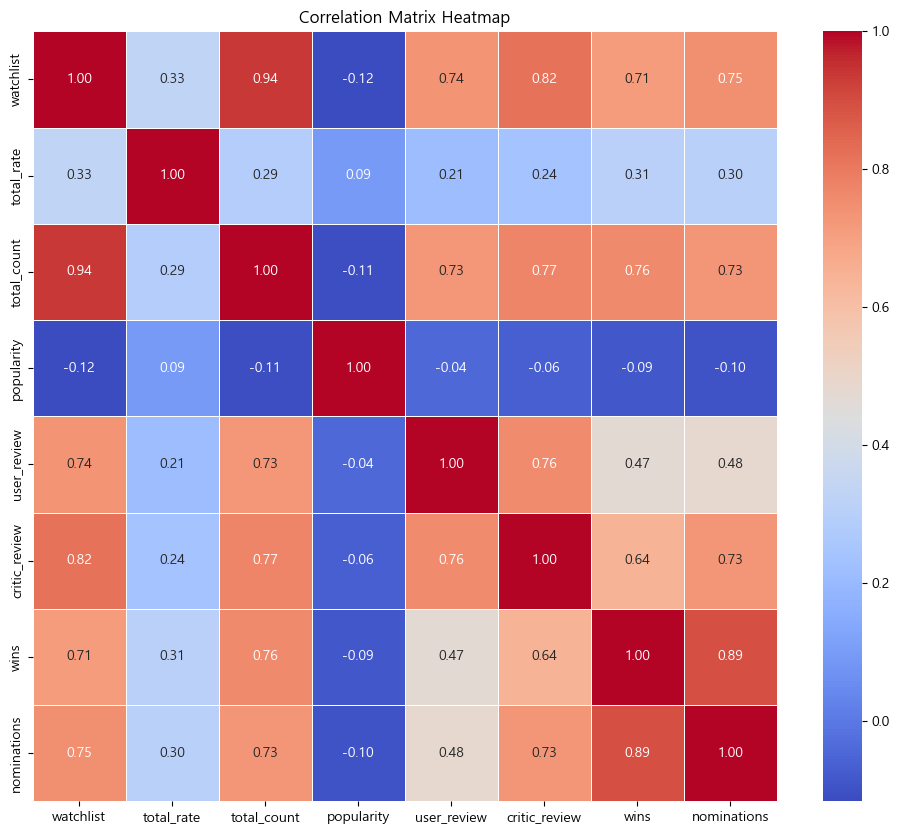

In [157]:
# 상관관계 분석
correlation_matrix =  metrics_df_scaled_df.corr()
# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

---

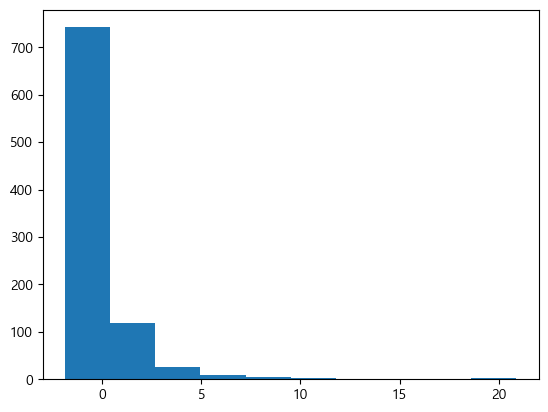

In [158]:
# success_metric 대한 histogram
plt.hist(df['success_metric'])
plt.show()

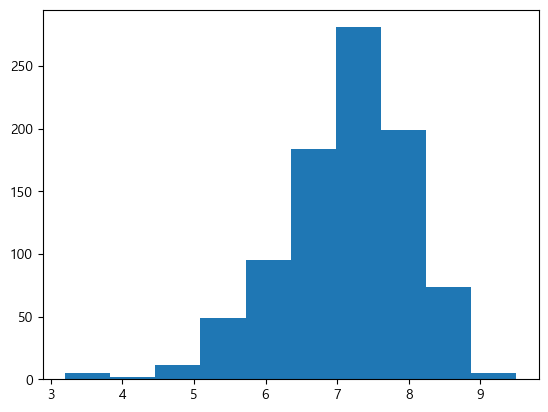

In [159]:
# total_rate 대한 histogram
plt.hist(df['total_rate'])
plt.show()

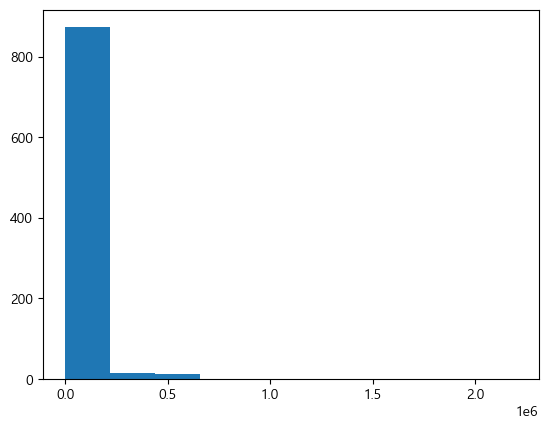

In [160]:
# total_count 대한 histogram
plt.hist(df['total_count'])
plt.show()

- y값이 너무 한쪽에 편중되어있어 정규분포로 하는게 좋을텐데 (일단 전반적인 드라마 인지도이기에 넘어가긴 한다만..)

# 머신러닝

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    int32  
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     